In [1]:
import csv
timings = {}

In [2]:
# Process runtime_pairs.txx
with open('runtime_pairs.txt', 'r') as f:
    for line in f:
        parts = line.strip().split()
        exe_name = parts[2][:-1]  # Remove colon from the end of the executable name
        runtime = float(parts[3])
        if exe_name not in timings:
            timings[exe_name] = {}
        timings[exe_name][exe_name] = runtime
print(timings)

{'2mm': {'2mm': 87.2932}, '3mm': {'3mm': 139.4532}, 'adi': {'adi': 221.3962}, 'atax': {'atax': 0.4832}, 'bicg': {'bicg': 0.4579}, 'correlation': {'correlation': 110.084}, 'covariance': {'covariance': 109.7517}, 'deriche': {'deriche': 10.7185}, 'doitgen': {'doitgen': 15.3496}, 'durbin': {'durbin': 0.0744}, 'fdtd-2d': {'fdtd-2d': 117.5043}, 'floyd-warshall': {'floyd-warshall': 186.2175}, 'gemm': {'gemm': 42.9845}, 'gemver': {'gemver': 1.0044}, 'gesummv': {'gesummv': 0.2489}, 'gramschmidt': {'gramschmidt': 154.4995}, 'heat-3d': {'heat-3d': 155.242}, 'jacobi-1d': {'jacobi-1d': 0.0677}, 'lu': {'lu': 313.1343}, 'ludcmp': {'ludcmp': 304.9204}, 'mvt': {'mvt': 0.7833}, 'nussinov': {'nussinov': 181.8059}, 'symm': {'symm': 91.6453}, 'syr2k': {'syr2k': 246.0023}, 'syrk': {'syrk': 34.8878}, 'trisolv': {'trisolv': 0.2173}, 'trmm': {'trmm': 45.1209}}


In [3]:
# Process runtime_individual.txt
with open('runtime_individual.txt', 'r') as f:
    for line in f:
        parts = line.strip().split()
        exe_name = parts[0]
        runtime = float(parts[2][:-1])
        if exe_name not in timings:
            timings[exe_name] = {}
        timings[exe_name]['default'] = runtime
print(timings)

{'2mm': {'2mm': 87.2932, 'default': 83.2836}, '3mm': {'3mm': 139.4532, 'default': 136.873787}, 'adi': {'adi': 221.3962, 'default': 201.959441}, 'atax': {'atax': 0.4832, 'default': 0.483144}, 'bicg': {'bicg': 0.4579, 'default': 0.448567}, 'correlation': {'correlation': 110.084, 'default': 69.880973}, 'covariance': {'covariance': 109.7517, 'default': 68.141852}, 'deriche': {'deriche': 10.7185, 'default': 5.082191}, 'doitgen': {'doitgen': 15.3496, 'default': 16.465486}, 'durbin': {'durbin': 0.0744, 'default': 0.08127}, 'fdtd-2d': {'fdtd-2d': 117.5043, 'default': 84.221851}, 'floyd-warshall': {'floyd-warshall': 186.2175, 'default': 153.259417}, 'gemm': {'gemm': 42.9845, 'default': 44.286052}, 'gemver': {'gemver': 1.0044, 'default': 0.857514}, 'gesummv': {'gesummv': 0.2489, 'default': 0.245358}, 'gramschmidt': {'gramschmidt': 154.4995, 'default': 104.903416}, 'heat-3d': {'heat-3d': 155.242, 'default': 136.385268}, 'jacobi-1d': {'jacobi-1d': 0.0677, 'default': 0.072554}, 'lu': {'lu': 313.134

In [4]:
# Open the 'runtimes.txt' file
with open('runtimes.txt', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    next(reader, None)  # Skip the header row
    
    for row in reader:
        pair_str = (row[0]+ ", " + row[1]).strip('[]')  # Remove the brackets from the pair
#         print(row)
        pair_list = pair_str.split(', ')
        pair = tuple([p.strip('./') for p in pair_list])  # Remove the "./" prefix from the executable names and create a tuple
        
        
        exe1, time1 = row[2], float(row[3])
        exe2, time2 = row[4], float(row[5])
                
        exe1 = exe1.strip('./')
        exe2 = exe2.strip('./')
        if(exe1 == "cholesky" or exe2 == "cholesky"):
            continue
#         print(exe1, time1)
#         print(exe2, time2)
        else:
            timings[exe1][exe2] = time1
            timings[exe2][exe1] = time2
print(timings)


{'2mm': {'2mm': 87.2932, 'default': 83.2836, '3mm': 88.19, 'adi': 92.33, 'atax': 91.24, 'bicg': 91.55, 'correlation': 99.56, 'covariance': 99.47, 'deriche': 96.68, 'doitgen': 81.27, 'durbin': 78.85, 'fdtd-2d': 104.96, 'floyd-warshall': 96.6, 'gemm': 89.76, 'gemver': 95.16, 'gesummv': 92.35, 'gramschmidt': 89.29, 'heat-3d': 94.59, 'jacobi-1d': 86.96, 'lu': 94.27, 'ludcmp': 97.72, 'mvt': 93.65, 'nussinov': 91.05, 'symm': 90.12, 'syr2k': 86.05, 'syrk': 83.41, 'trisolv': 94.03, 'trmm': 85.17}, '3mm': {'3mm': 139.4532, 'default': 136.873787, '2mm': 146.37, 'adi': 160.88, 'atax': 145.48, 'bicg': 149.67, 'correlation': 153.68, 'covariance': 153.46, 'deriche': 159.17, 'doitgen': 137.98, 'durbin': 141.98, 'fdtd-2d': 169.44, 'floyd-warshall': 154.2, 'gemm': 145.13, 'gemver': 147.93, 'gesummv': 148.88, 'gramschmidt': 150.12, 'heat-3d': 152.67, 'jacobi-1d': 132.2, 'lu': 158.43, 'ludcmp': 148.97, 'mvt': 150.22, 'nussinov': 145.32, 'symm': 155.51, 'syr2k': 154.71, 'syrk': 140.53, 'trisolv': 151.04, 

In [5]:
#Making sure that inner_key sequence is same for all outer_keys

new_runtime_info = {}
inner_keys = set()
for outer_key in timings:
    # Get all the inner keys for this outer key
    current_inner_keys = timings[outer_key].keys()
    # Add the current inner keys to the set of all inner keys
    inner_keys.update(current_inner_keys)
    # Add the outer key to the new dictionary
    new_runtime_info[outer_key] = {}
# Reorder the inner keys so that 'default' is first
inner_keys = ['default'] + sorted(inner_keys - {'default'})
# Fill in the values for the new dictionary
for outer_key in new_runtime_info:
    for inner_key in inner_keys:
        if inner_key in timings[outer_key]:
            new_runtime_info[outer_key][inner_key] = timings[outer_key][inner_key]
# Update runtime_info with the new dictionary
timings = new_runtime_info
print(timings)

{'2mm': {'default': 83.2836, '2mm': 87.2932, '3mm': 88.19, 'adi': 92.33, 'atax': 91.24, 'bicg': 91.55, 'correlation': 99.56, 'covariance': 99.47, 'deriche': 96.68, 'doitgen': 81.27, 'durbin': 78.85, 'fdtd-2d': 104.96, 'floyd-warshall': 96.6, 'gemm': 89.76, 'gemver': 95.16, 'gesummv': 92.35, 'gramschmidt': 89.29, 'heat-3d': 94.59, 'jacobi-1d': 86.96, 'lu': 94.27, 'ludcmp': 97.72, 'mvt': 93.65, 'nussinov': 91.05, 'symm': 90.12, 'syr2k': 86.05, 'syrk': 83.41, 'trisolv': 94.03, 'trmm': 85.17}, '3mm': {'default': 136.873787, '2mm': 146.37, '3mm': 139.4532, 'adi': 160.88, 'atax': 145.48, 'bicg': 149.67, 'correlation': 153.68, 'covariance': 153.46, 'deriche': 159.17, 'doitgen': 137.98, 'durbin': 141.98, 'fdtd-2d': 169.44, 'floyd-warshall': 154.2, 'gemm': 145.13, 'gemver': 147.93, 'gesummv': 148.88, 'gramschmidt': 150.12, 'heat-3d': 152.67, 'jacobi-1d': 132.2, 'lu': 158.43, 'ludcmp': 148.97, 'mvt': 150.22, 'nussinov': 145.32, 'symm': 155.51, 'syr2k': 154.71, 'syrk': 140.53, 'trisolv': 151.04, 

In [6]:
import pandas as pd

nested_dict = timings

dict_list = []
for outer_key in nested_dict:
    inner_dict = nested_dict[outer_key]
    dict_list.append({'outer_key': outer_key, **inner_dict})

# Create a DataFrame from the list of dictionaries and set the index to 'outer_key'
df = pd.DataFrame(dict_list).set_index('outer_key')

# Display the DataFrame
print(df)

                   default       2mm       3mm       adi      atax      bicg  \
outer_key                                                                      
2mm              83.283600   87.2932   88.1900   92.3300   91.2400   91.5500   
3mm             136.873787  146.3700  139.4532  160.8800  145.4800  149.6700   
adi             201.959441  226.4600  212.0100  221.3962  215.3400  209.3700   
atax              0.483144    0.4800    0.4900    0.5200    0.4832    0.4900   
bicg              0.448567    0.4500    0.4500    0.4700    0.4500    0.4579   
correlation      69.880973   87.7100   89.8900   94.9200   87.9900   87.9900   
covariance       68.141852   87.1600   89.9600   94.6500   86.4000   84.4600   
deriche           5.082191    6.5300    6.5700    7.0100    6.4000    6.4500   
doitgen          16.465486   17.4400   16.9800   17.0300   17.4200   17.3100   
durbin            0.081270    0.0800    0.0800    0.0800    0.0800    0.0800   
fdtd-2d          84.221851   95.6400   9

In [7]:
#normalize the timings
import matplotlib.pyplot as plt

# Create a new dictionary to store the normalized runtimes
normalized_info = {}

# Normalize the runtimes to the 'default' time (i.e. 'none' time)
for outer_key in timings:
    default_time = timings[outer_key]['default']
    normalized_info[outer_key] = {}
    for inner_key in timings[outer_key]:
        if inner_key != 'default':
            normalized_time = timings[outer_key][inner_key] / default_time
            normalized_info[outer_key][inner_key] = normalized_time
print(normalized_info)

{'2mm': {'2mm': 1.0481439322987958, '3mm': 1.0589119586569264, 'adi': 1.1086216253860304, 'atax': 1.0955338145805416, 'bicg': 1.099256036002286, 'correlation': 1.1954334346738134, 'covariance': 1.1943527897449198, 'deriche': 1.1608527969492193, 'doitgen': 0.9758223707908878, 'durbin': 0.9467650293695276, 'fdtd-2d': 1.260272130407427, 'floyd-warshall': 1.1598922236790916, 'gemm': 1.0777632090831808, 'gemver': 1.1426019048167946, 'gesummv': 1.1088617687035622, 'gramschmidt': 1.0721198411211812, 'heat-3d': 1.1357578202671355, 'jacobi-1d': 1.0441431446287142, 'lu': 1.1319155271866248, 'ludcmp': 1.1733402494608782, 'mvt': 1.124471084343136, 'nussinov': 1.0932524530639884, 'symm': 1.0820857887987552, 'syr2k': 1.0332166236810127, 'syrk': 1.0015177057668014, 'trisolv': 1.129033807376242, 'trmm': 1.0226503177096091}, '3mm': {'2mm': 1.0693793399608358, '3mm': 1.0188451934920162, 'adi': 1.1753894118528334, 'atax': 1.062876999231416, 'bicg': 1.093489142665425, 'correlation': 1.1227862059519111, 'c

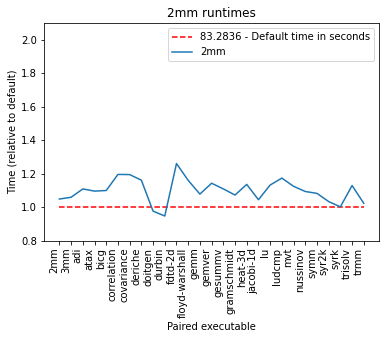

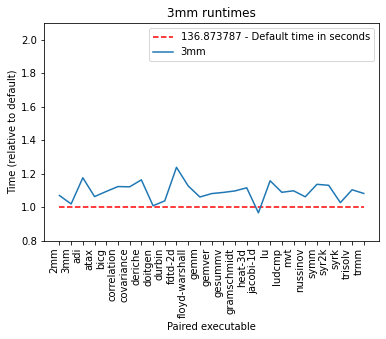

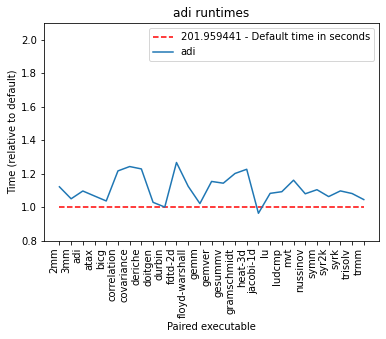

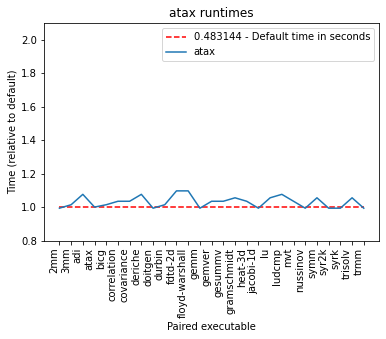

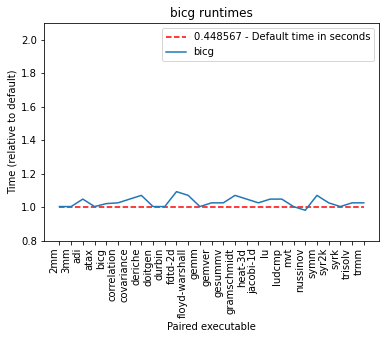

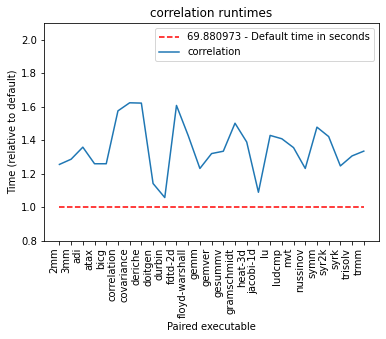

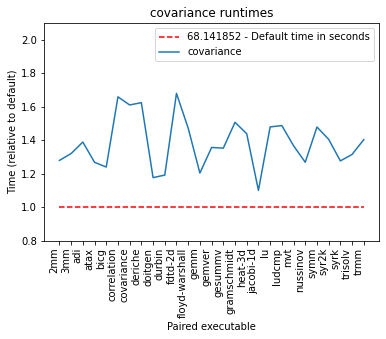

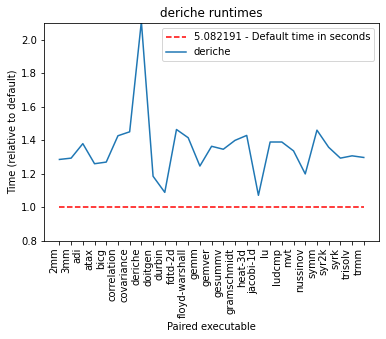

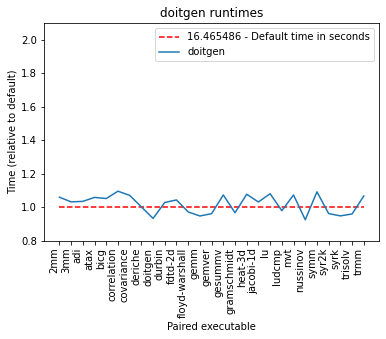

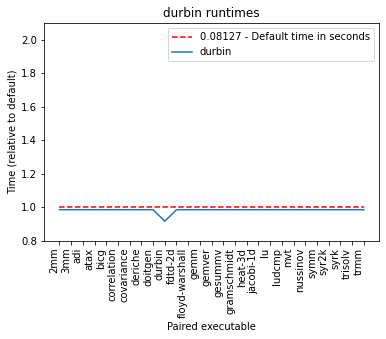

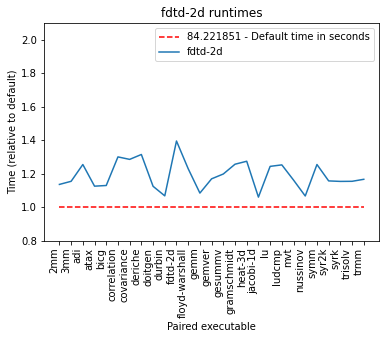

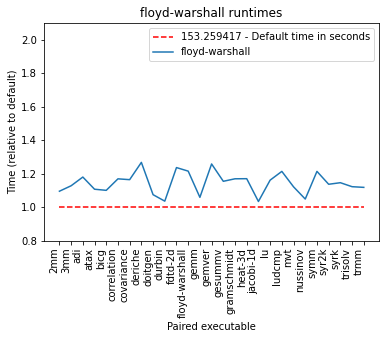

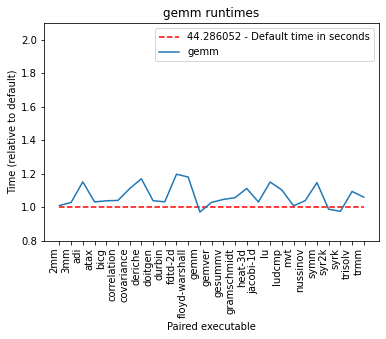

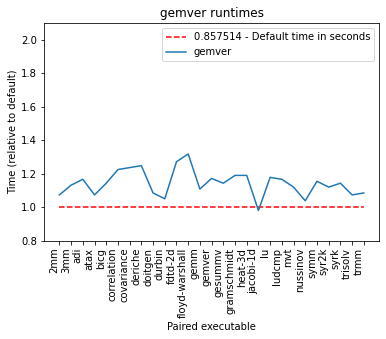

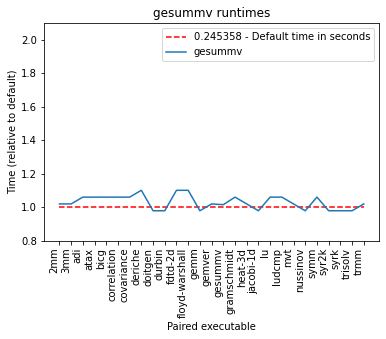

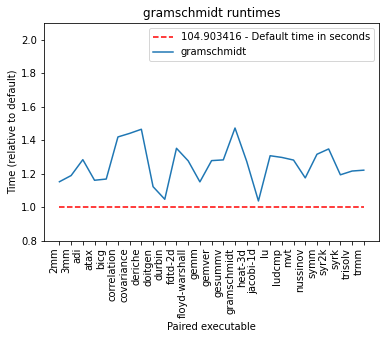

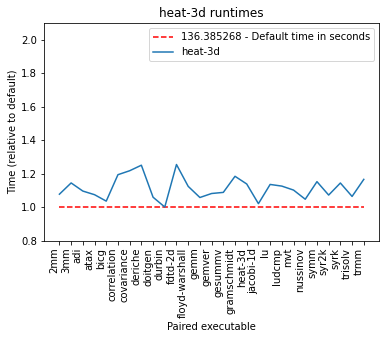

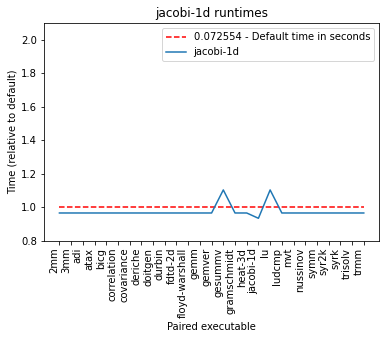

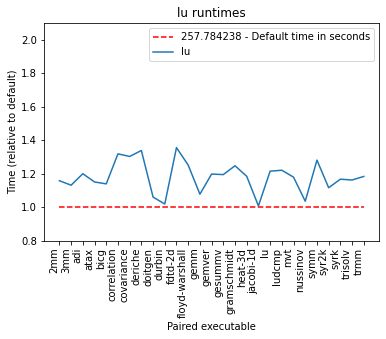

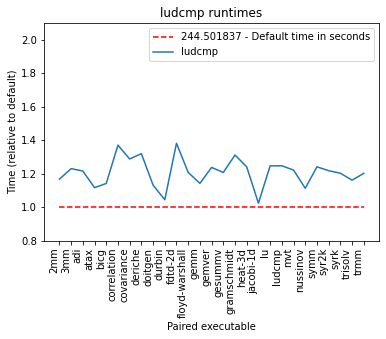

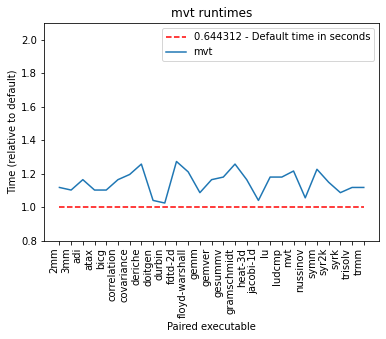

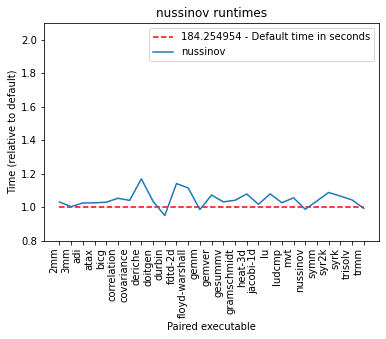

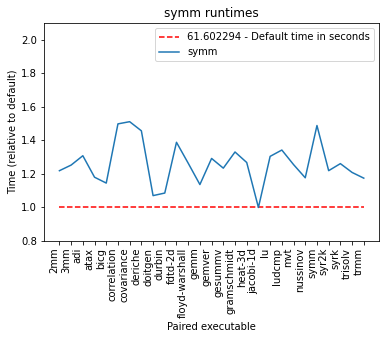

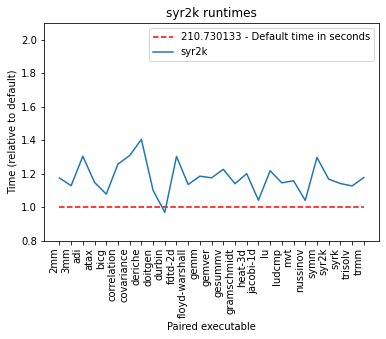

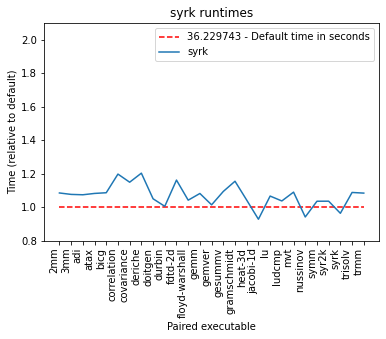

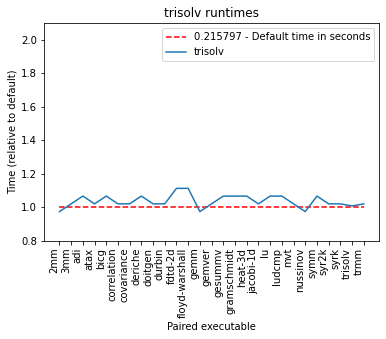

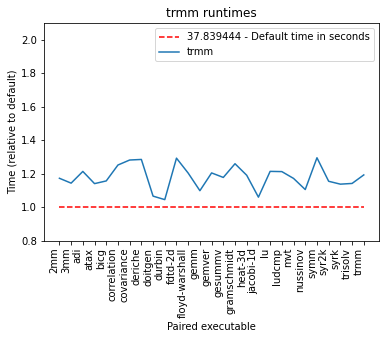

In [8]:
import os

# create a directory to save the plots
directory = "plots"
if not os.path.exists(directory):
    os.makedirs(directory)
    
# Plot a separate line chart for each outer key
import matplotlib.pyplot as plt

min_ratio = min(normalized_info[outer_key][inner_key] for outer_key in normalized_info for inner_key in normalized_info[outer_key])
max_ratio = max(normalized_info[outer_key][inner_key] for outer_key in normalized_info for inner_key in normalized_info[outer_key])

for outer_key in normalized_info.keys():
    # Get the inner keys and normalized runtimes for the current outer key
    inner_keys = [k for k in normalized_info[outer_key].keys() if k != 'Default']
    runtimes = [normalized_info[outer_key][k] for k in inner_keys]
    default = [1] * len(inner_keys)

    # Plot the line charts
    default_time = timings[outer_key]['default']
    plt.plot(inner_keys, default, 'r--', label=f'{default_time} - Default time in seconds')
    plt.plot(inner_keys, runtimes, label=outer_key)

    # Add a title, x-axis label, y-axis label, and legend
    plt.title(f'{outer_key} runtimes')
    plt.xlabel('Paired executable')
    plt.ylabel('Time (relative to default)')
    plt.ylim(round(min_ratio*0.85, 1), round(max_ratio, 1))
    plt.legend()

    # Rotate the x-axis tick labels and show the plot
    plt.xticks(rotation=90, ha='right')
    plt.savefig(os.path.join(directory, f"{outer_key}_plot.png"), bbox_inches='tight')
    plt.show()

In [9]:
# Create a list of all default timings
default_timings = [(key, timings[key]['default']) for key in timings]

# Get the 10 lowest timings sorted in ascending order
lowest_10 = sorted(default_timings, key=lambda x: x[1])[:10]

# Loop through the lowest_5 list and print the outerkey and its default timing
for outerkey, time in lowest_10:
    print(f"{outerkey}: {time} seconds")


jacobi-1d: 0.072554 seconds
durbin: 0.08127 seconds
trisolv: 0.215797 seconds
gesummv: 0.245358 seconds
bicg: 0.448567 seconds
atax: 0.483144 seconds
mvt: 0.644312 seconds
gemver: 0.857514 seconds
deriche: 5.082191 seconds
doitgen: 16.465486 seconds


In [10]:
# Create a list of all default timings
default_timings = [(key, timings[key]['default']) for key in timings]

# Get the 10 highest timings
highest_10 = sorted(default_timings, key=lambda x: x[1])[10:]

for outerkey, time in highest_10:
    print(f"{outerkey}: {time} seconds")


syrk: 36.229743 seconds
trmm: 37.839444 seconds
gemm: 44.286052 seconds
symm: 61.602294 seconds
covariance: 68.141852 seconds
correlation: 69.880973 seconds
2mm: 83.2836 seconds
fdtd-2d: 84.221851 seconds
gramschmidt: 104.903416 seconds
heat-3d: 136.385268 seconds
3mm: 136.873787 seconds
floyd-warshall: 153.259417 seconds
nussinov: 184.254954 seconds
adi: 201.959441 seconds
syr2k: 210.730133 seconds
ludcmp: 244.501837 seconds
lu: 257.784238 seconds


In [11]:
!pip install seaborn

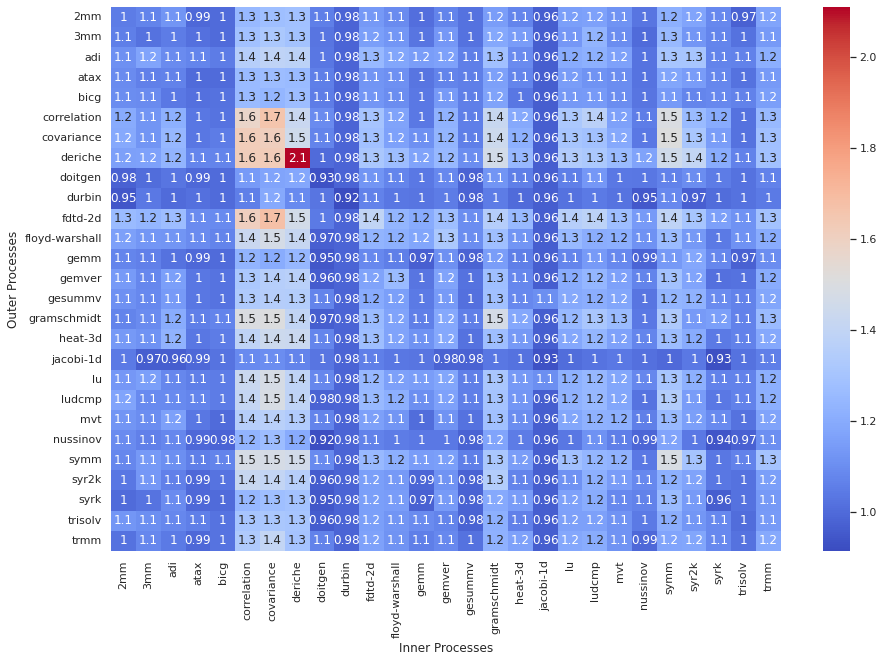

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the normalized info dictionary into a DataFrame
df = pd.DataFrame.from_dict(normalized_info)

# Create a heatmap using Seaborn
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df, annot=True, cmap='coolwarm')

# Rotate x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

# Add x-axis and y-axis labels
plt.xlabel('Inner Processes')
plt.ylabel('Outer Processes')

plt.savefig(os.path.join(directory, "heatmap.png"))
# Show the plot
plt.show()
